In [3]:
import pandas as pd
import pandas as pd

# Read the dataset
dataset = pd.read_csv("SMSSpamCollection", sep="\t", names=['label', 'message'])

# Display the dataset
print(dataset)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset["label"] = dataset["label"].map({'ham':0,'spam':1})
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


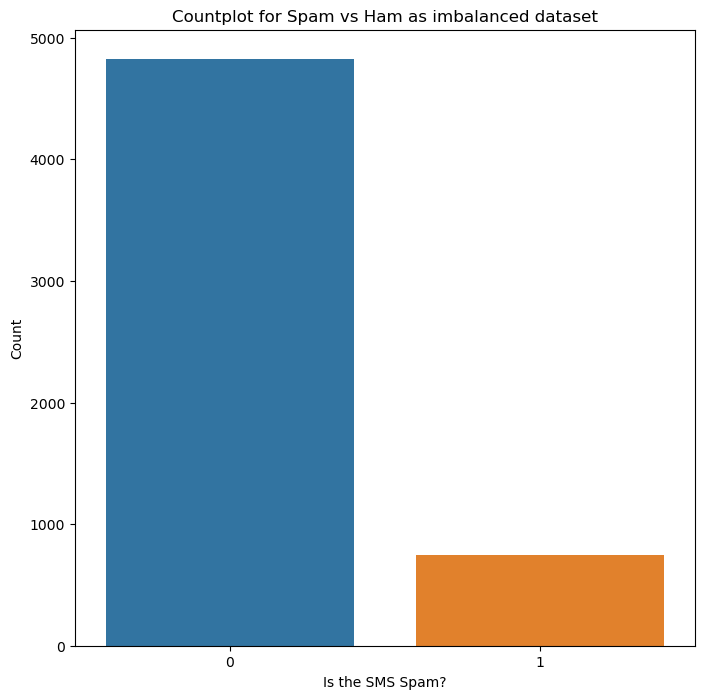

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,8))
p = sns.countplot(x = "label" , data = dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')
                  

In [11]:
only_spam = dataset[dataset["label"] == 1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
dataset.shape

(5572, 2)

In [13]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
count

6

In [14]:
for i in range(0, count-1):
    dataset = pd.concat([dataset, only_spam])
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


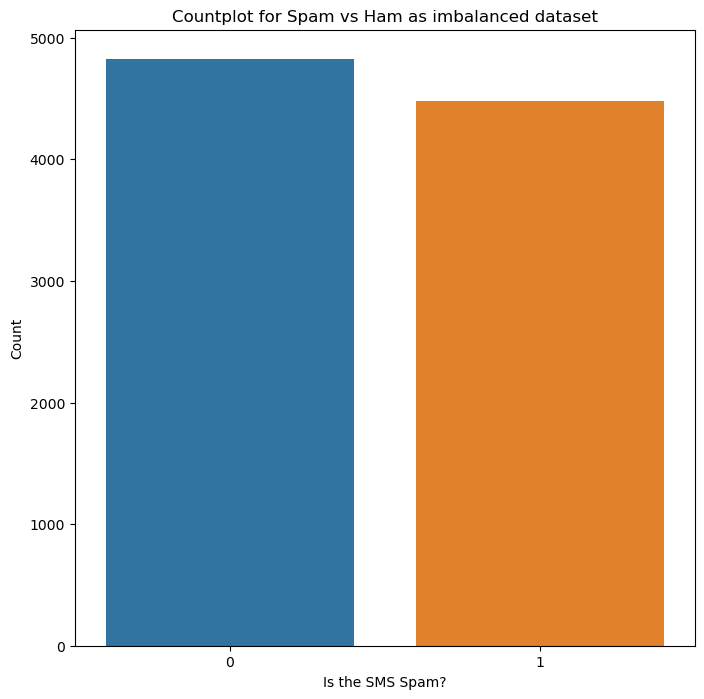

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,8))
p = sns.countplot(x = "label" , data = dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')
                  

In [18]:
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))
dataset

,label,message,word-count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20,20
1,0,Ok lar... Joking wif u oni...,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,28
3,0,U dun say so early hor... U c already then say...,11,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13,13
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,28


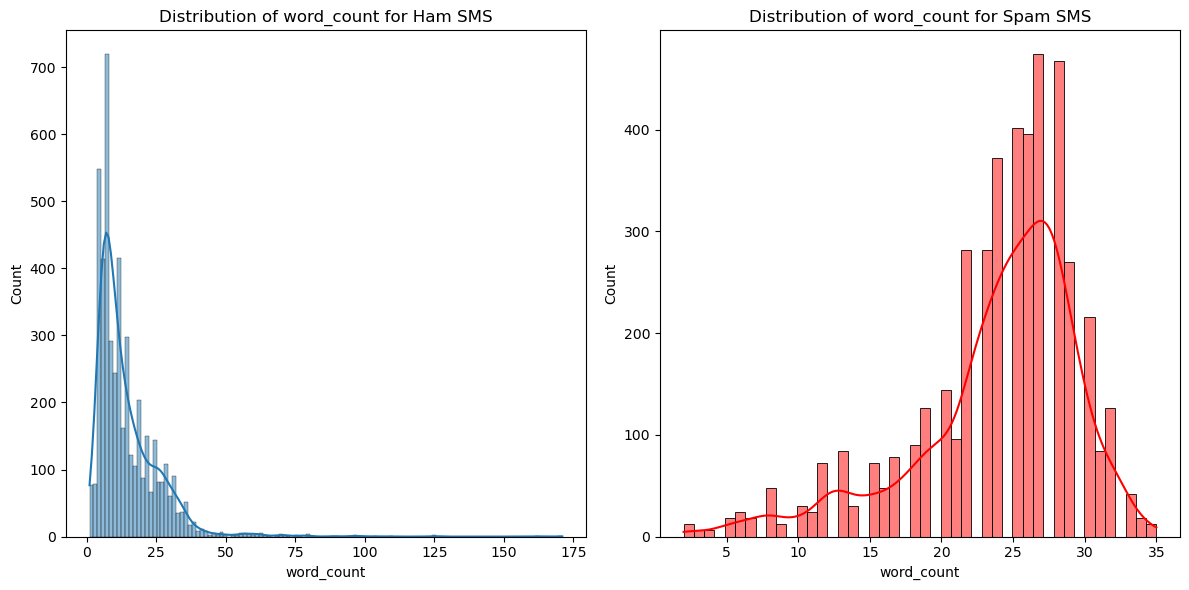

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde = True)
p = plt.title('Distribution of word_count for Ham SMS')

plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, color = "red", kde = True)
p = plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [24]:
def currency(data):
    currency_symbols = ['$', '€', '£', '¥', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0
dataset["contains_currency_symbol"] = dataset["message"].apply(currency)
dataset

,label,message,word-count,word_count,contains_currency-symbol,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,20,0,0
1,0,Ok lar... Joking wif u oni...,6,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,28,0,0
3,0,U dun say so early hor... U c already then say...,11,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,13,0,0
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,16,0,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,28,0,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,28,0,0


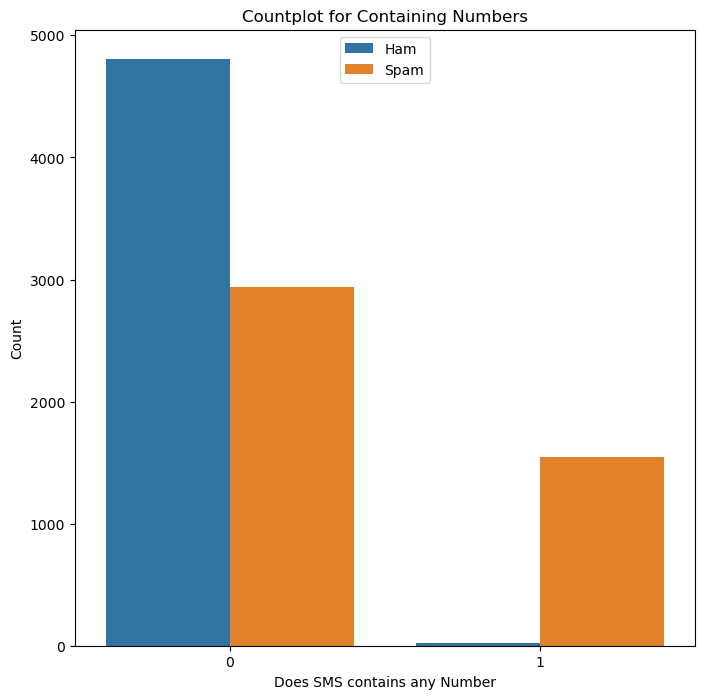

In [25]:
plt.figure(figsize=(8,8))
p = sns.countplot(x = "contains_currency_symbol" , data = dataset, hue = 'label')
p = plt.title('Countplot for Containing Numbers')
p = plt.xlabel('Does SMS contains any Number')
p = plt.ylabel('Count')
p = plt.legend(labels = ["Ham", "Spam"], loc = 9)                  

In [29]:
import nltk
import re 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
wnl = WordNetLemmatizer()

# Define the list of stopwords
stop_words = set(stopwords.words('english'))

corpus = []

# Preprocess each SMS message
for sms in list(dataset.message):
    # Remove non-alphanumeric characters and convert to lowercase
    message = re.sub('[^a-zA-Z]', ' ', sms)
    message = message.lower()
    # Tokenize the message
    words = message.split()
    # Lemmatize each word and remove stopwords
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    # Join the words back into a string
    message = ' '.join(lemm_words)
    corpus.append(message)

In [28]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)

# Transform the corpus into TF-IDF vectors
vectors = tfidf.fit_transform(corpus).toarray()

# Get the feature names
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame for the TF-IDF vectors with feature names as columns
x = pd.DataFrame(vectors, columns=feature_names)

# Get the labels
y = dataset['label']


In [36]:
x

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [37]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [39]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.343368,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

mnb = MultinomialNB()

# Perform cross-validation
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)

# Print the mean and standard deviation of F1 scores
print(round(cv.mean(), 3))
print(round(cv.std(), 3))


0.943
0.004


In [42]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
y_test

1155    0
1790    0
3003    0
1122    1
592     1
       ..
4147    0
274     0
1345    0
2367    1
4031    0
Name: label, Length: 1862, dtype: int64

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [45]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[905,  54],
       [ 56, 847]], dtype=int64)

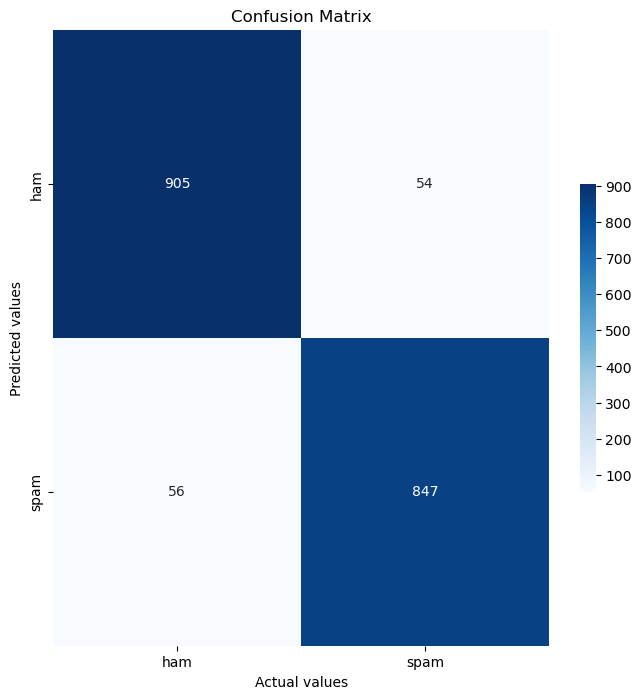

In [46]:
# Assuming you have the confusion matrix stored in a variable named 'cm'
# Replace 'cm' with the actual variable name of your confusion matrix

plt.figure(figsize=(8, 8))
axis_labels = ['ham', 'spam']

# Create heatmap
g = sns.heatmap(data=cm, annot=True, cmap='Blues', fmt='g', cbar_kws={"shrink": 0.5}, xticklabels=axis_labels, yticklabels=axis_labels)

# Set labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion Matrix')

plt.show()


In [70]:
def predict_spam(sms):
    # Preprocess the message
    message = re.sub('[^a-zA-Z]', ' ', sms)  # Remove non-alphabetic characters
    message = message.lower()  # Convert to lowercase
    message = message.split()  # Tokenize the message
    filtered_words = [word for word in message if word not in set(stopwords.words('english'))] 
   
    # Lemmatize the message
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]

    # Join the words back into a string
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return classifier.predict(temp)  # Return the predicted label

# Assuming you have defined the sample_message, classifier, tfidf_vectorizer, and other required variables
sample_message = 'IMPORTANT - You could be entitled up to $160 in compensation from mis-sold PPI on a credit card or loan'

# Print the prediction
if predict_spam(sample_message):
    print("The message is predicted to be spam.")
else:
    print("The message is predicted to be ham (not spam).")


NameError: name 'classifier' is not defined